In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cdac project/Preprocessed_Data_Part1.csv.csv")

In [6]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cdac project/Preprocessed_Data_Part2.csv.csv")

In [7]:
df = pd.concat([df1, df2], ignore_index=True)

In [8]:
df.head()

,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Power_Consumption_kW,Last_Maintenance_Days_Ago,Maintenance_History_Count,Failure_History_Count,Error_Codes_Last_30_Days,...,Failure_Within_7_Days,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index,AI_Override_Events,Machine_Age,Avg_Fluid_Level,AI_Supervision_Flag,Machine_Type_Index
0,2034,75075,58.07,11.67,80.29,114.39,159,11,5,2,...,False,74.995513,119.917514,39.984794,499.760966,5,6,73.005,1,29.0
1,2032,10544,29.29,10.86,86.49,312.88,134,8,0,0,...,False,74.995513,119.917514,39.984794,499.760966,0,8,71.820,0,17.0
2,2030,63783,56.84,10.63,58.90,121.98,33,5,0,3,...,False,74.995513,119.917514,39.984794,499.760966,0,10,38.055,0,1.0
3,2004,27373,64.73,8.06,71.28,139.24,0,5,1,5,...,False,74.995513,119.917514,39.984794,499.760966,0,36,65.065,0,7.0
4,2040,87687,88.02,10.13,76.97,192.83,269,1,3,1,...,False,74.995513,119.917514,39.984794,499.760966,0,0,93.060,0,20.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Installation_Year           500000 non-null  int64  
 1   Operational_Hours           500000 non-null  int64  
 2   Temperature_C               500000 non-null  float64
 3   Vibration_mms               500000 non-null  float64
 4   Sound_dB                    500000 non-null  float64
 5   Power_Consumption_kW        500000 non-null  float64
 6   Last_Maintenance_Days_Ago   500000 non-null  int64  
 7   Maintenance_History_Count   500000 non-null  int64  
 8   Failure_History_Count       500000 non-null  int64  
 9   Error_Codes_Last_30_Days    500000 non-null  int64  
 10  Remaining_Useful_Life_days  500000 non-null  float64
 11  Failure_Within_7_Days       500000 non-null  bool   
 12  Laser_Intensity             500000 non-null  float64
 13  Hydraulic_Pres

In [10]:
df.shape

(500000, 21)

In [11]:
df.columns

Index(['Installation_Year', 'Operational_Hours', 'Temperature_C',
       'Vibration_mms', 'Sound_dB', 'Power_Consumption_kW',
       'Last_Maintenance_Days_Ago', 'Maintenance_History_Count',
       'Failure_History_Count', 'Error_Codes_Last_30_Days',
       'Remaining_Useful_Life_days', 'Failure_Within_7_Days',
       'Laser_Intensity', 'Hydraulic_Pressure_bar', 'Coolant_Flow_L_min',
       'Heat_Index', 'AI_Override_Events', 'Machine_Age', 'Avg_Fluid_Level',
       'AI_Supervision_Flag', 'Machine_Type_Index'],
      dtype='object')

In [12]:
df.skew()

,0
Installation_Year,0.004596
Operational_Hours,0.000590
Temperature_C,0.002043
Vibration_mms,-0.007103
Sound_dB,0.002030
Power_Consumption_kW,-0.000745
Last_Maintenance_Days_Ago,0.000683
Maintenance_History_Count,0.450035
Failure_History_Count,0.706340
Error_Codes_Last_30_Days,0.572035


In [13]:
X = df.drop(['Remaining_Useful_Life_days', 'Failure_Within_7_Days'], axis=1)
Y = df[['Remaining_Useful_Life_days', 'Failure_Within_7_Days']]

In [14]:
Y

,Remaining_Useful_Life_days,Failure_Within_7_Days
0,232.0,False
1,871.0,False
2,348.0,False
3,745.0,False
4,110.0,False
...,...,...
499995,491.0,False
499996,0.0,True
499997,336.0,False
499998,129.0,False


In [15]:
X.describe()

,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Power_Consumption_kW,Last_Maintenance_Days_Ago,Maintenance_History_Count,Failure_History_Count,Error_Codes_Last_30_Days,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index,AI_Override_Events,Machine_Age,Avg_Fluid_Level,AI_Supervision_Flag,Machine_Type_Index
count,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,2019.962360,50012.424764,59.997682,9.99114,75.003477,149.922161,182.257866,5.003128,2.000588,3.000840,74.995513,119.917514,39.984794,499.760966,0.602098,20.037640,66.785363,0.300830,15.924194
std,11.829812,28861.849078,14.986973,4.99953,9.990791,79.955937,105.552537,2.238043,1.413087,1.730541,1.747095,3.699139,3.017573,15.039099,1.203647,11.829812,14.918402,0.458619,9.524527
min,2000.000000,0.000000,-15.730000,-17.82000,23.650000,-222.740000,0.000000,0.000000,0.000000,0.000000,34.970000,52.680000,-0.160000,296.440000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,25055.000000,49.890000,6.62000,68.270000,96.090000,91.000000,3.000000,1.000000,2.000000,74.995513,119.917514,39.984794,499.760966,0.000000,10.000000,56.685000,0.000000,8.000000
50%,2020.000000,49973.000000,60.000000,10.00000,75.000000,149.950000,182.000000,5.000000,2.000000,3.000000,74.995513,119.917514,39.984794,499.760966,0.000000,20.000000,67.350000,0.000000,16.000000
75%,2030.000000,74995.000000,70.050000,13.36000,81.730000,203.900000,274.000000,6.000000,3.000000,4.000000,74.995513,119.917514,39.984794,499.760966,1.000000,30.000000,77.515000,1.000000,24.000000
max,2040.000000,100000.000000,127.330000,32.47000,120.700000,544.200000,365.000000,18.000000,12.000000,13.000000,114.320000,185.380000,80.790000,694.170000,11.000000,40.000000,100.000000,1.000000,32.000000


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [17]:
X.describe()

,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Power_Consumption_kW,Last_Maintenance_Days_Ago,Maintenance_History_Count,Failure_History_Count,Error_Codes_Last_30_Days,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index,AI_Override_Events,Machine_Age,Avg_Fluid_Level,AI_Supervision_Flag,Machine_Type_Index
count,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05
mean,8.711680e-16,-1.061693e-16,-1.159499e-15,4.726530e-17,1.613170e-15,-2.348770e-16,-6.705392e-17,-9.424639e-17,-2.282086e-17,-9.129408e-17,2.534854e-14,2.209237e-15,-1.015763e-15,-1.316400e-14,1.917044e-17,1.537614e-17,3.982432e-16,-2.739142e-17,3.604228e-18
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.687464e+00,-1.732823e+00,-5.052906e+00,-5.562757e+00,-5.140086e+00,-4.660849e+00,-1.726705e+00,-2.235495e+00,-1.415758e+00,-1.734049e+00,-2.290977e+01,-1.817655e+01,-1.330368e+01,-1.351950e+01,-5.002284e-01,-1.693827e+00,-4.476715e+00,-6.559476e-01,-1.671916e+00
25%,-8.421410e-01,-8.647211e-01,-6.744319e-01,-6.742922e-01,-6.739690e-01,-6.732735e-01,-8.645738e-01,-8.950364e-01,-7.080872e-01,-5.783398e-01,2.440200e-14,1.152501e-14,-7.064056e-15,-2.267828e-14,-5.002284e-01,-8.485046e-01,-6.770413e-01,-6.559476e-01,-8.319785e-01
50%,3.181795e-03,-1.365983e-03,1.546518e-04,1.772112e-03,-3.479968e-04,3.481836e-04,-2.443013e-03,-1.397651e-03,-4.161106e-04,-4.853977e-04,2.440200e-14,1.152501e-14,-7.064056e-15,-2.267828e-14,-5.002284e-01,-3.181795e-03,3.784837e-02,-6.559476e-01,7.959038e-03
75%,8.485046e-01,8.655925e-01,6.707377e-01,6.738360e-01,6.732730e-01,6.750955e-01,8.691617e-01,4.454217e-01,7.072550e-01,5.773690e-01,2.440200e-14,1.152501e-14,-7.064056e-15,-2.267828e-14,3.305806e-01,8.421410e-01,7.192223e-01,1.524512e+00,8.478966e-01
max,1.693827e+00,1.731962e+00,4.492728e+00,4.496199e+00,4.573869e+00,4.931194e+00,1.731293e+00,5.807255e+00,7.076295e+00,5.778059e+00,2.250852e+01,1.769670e+01,1.352254e+01,1.292692e+01,8.638670e+00,1.687464e+00,2.226423e+00,1.524512e+00,1.687834e+00


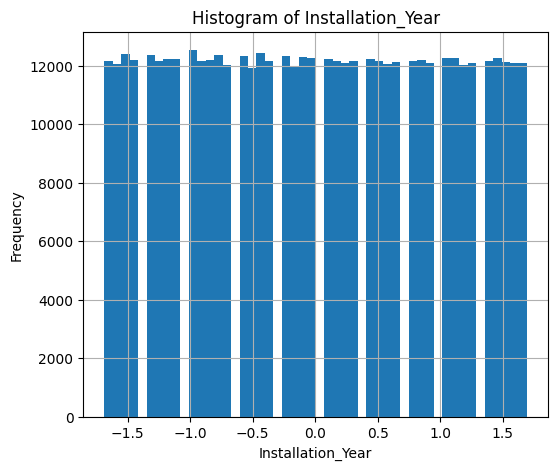

<Figure size 600x500 with 0 Axes>

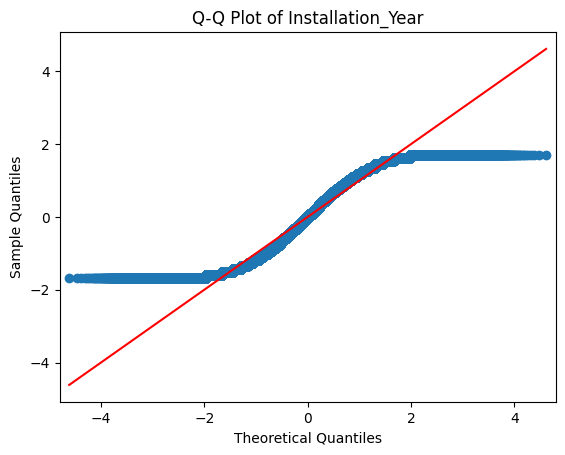

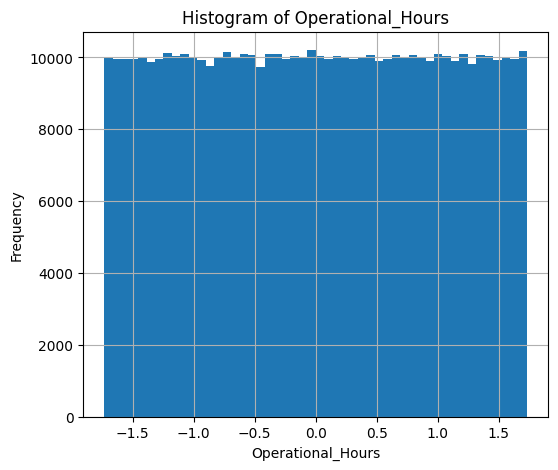

<Figure size 600x500 with 0 Axes>

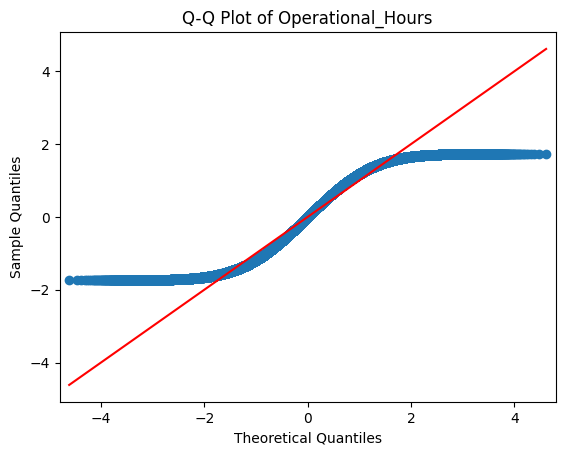

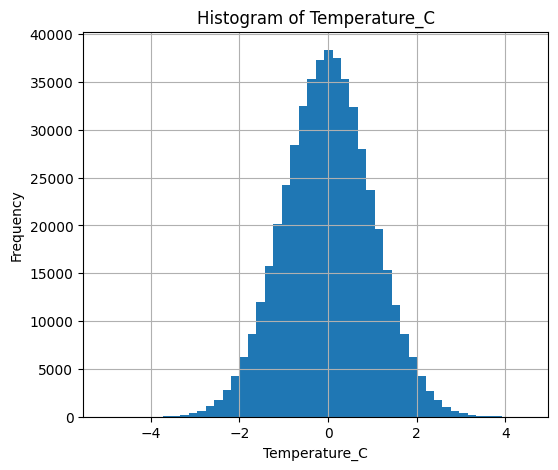

<Figure size 600x500 with 0 Axes>

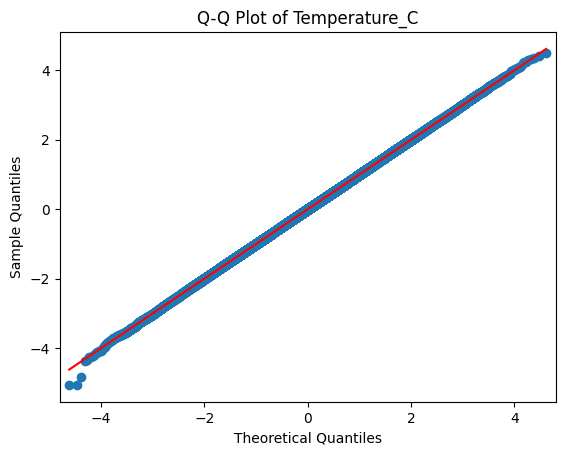

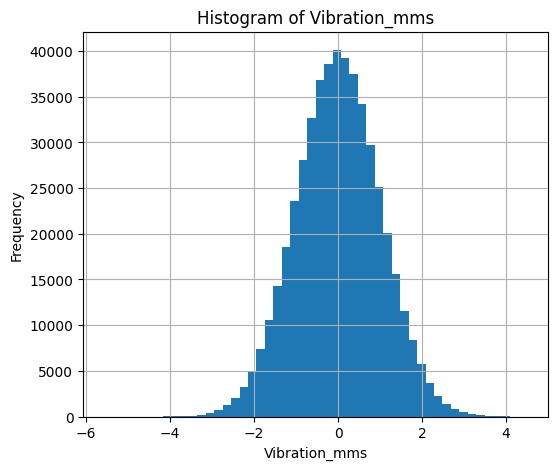

<Figure size 600x500 with 0 Axes>

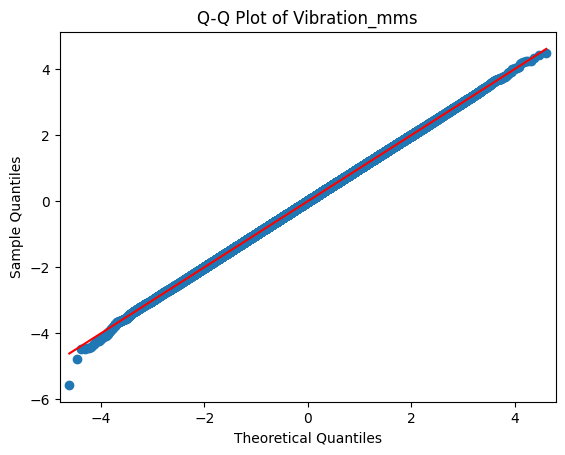

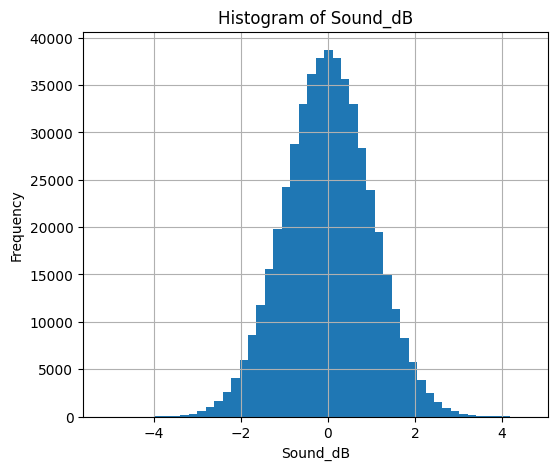

<Figure size 600x500 with 0 Axes>

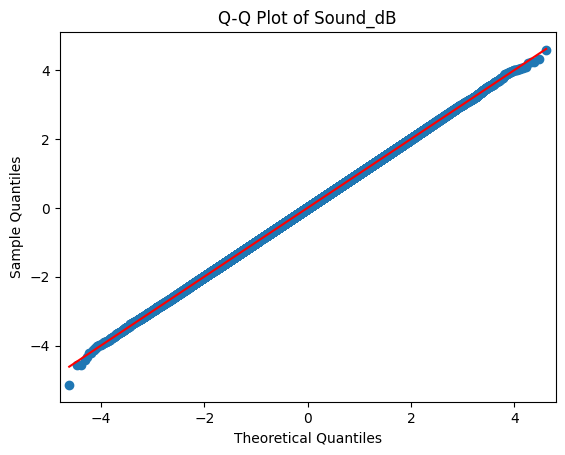

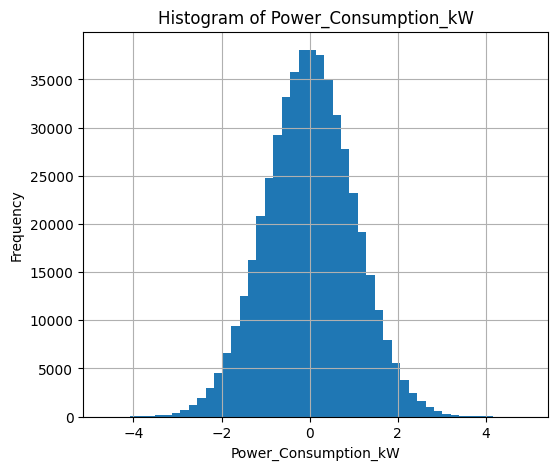

<Figure size 600x500 with 0 Axes>

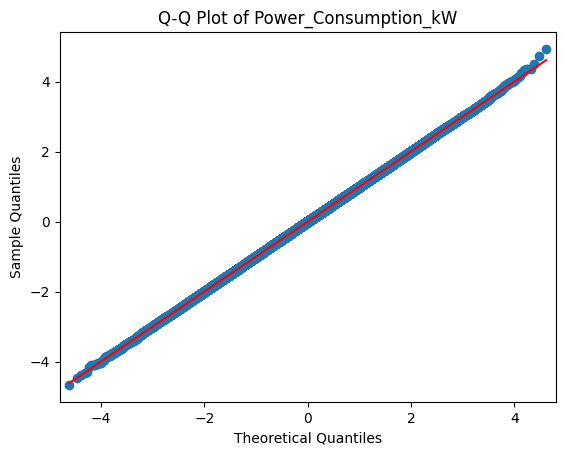

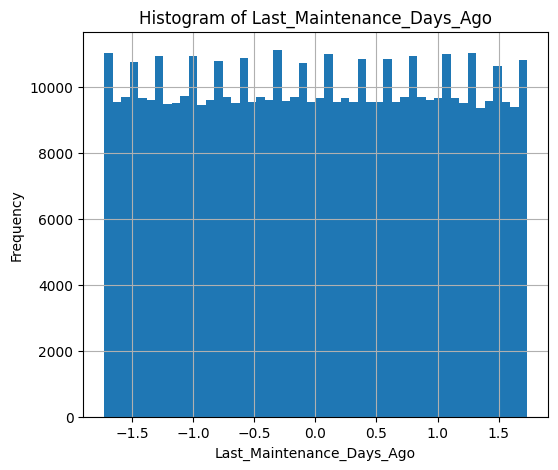

<Figure size 600x500 with 0 Axes>

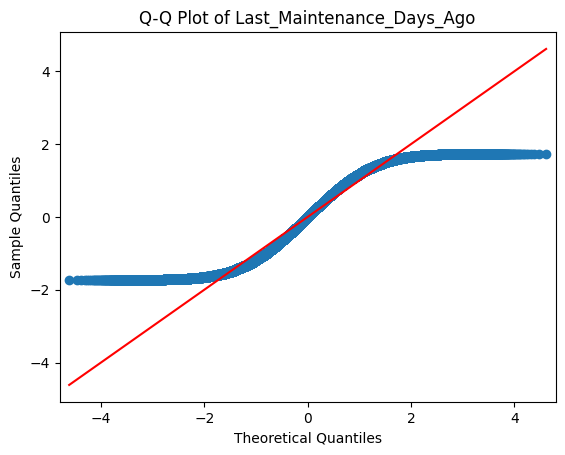

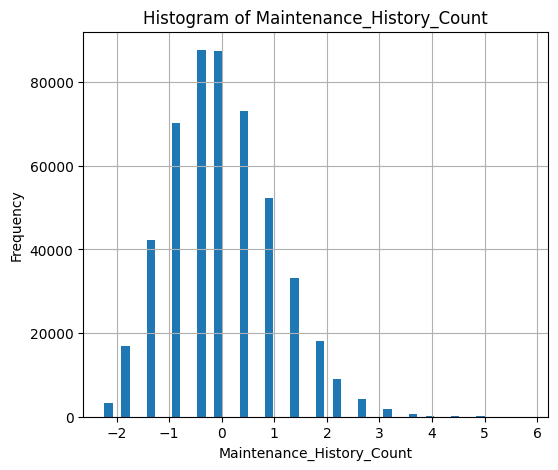

<Figure size 600x500 with 0 Axes>

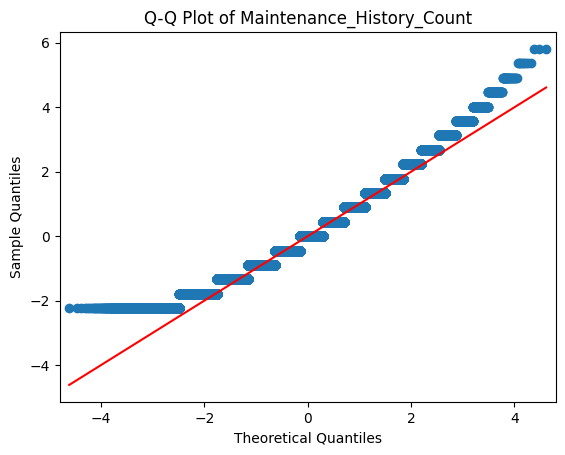

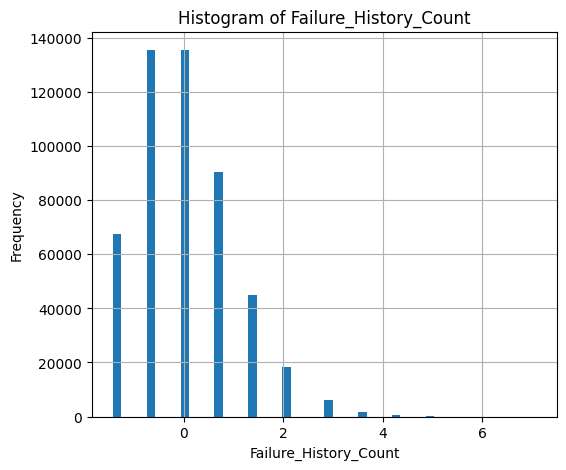

<Figure size 600x500 with 0 Axes>

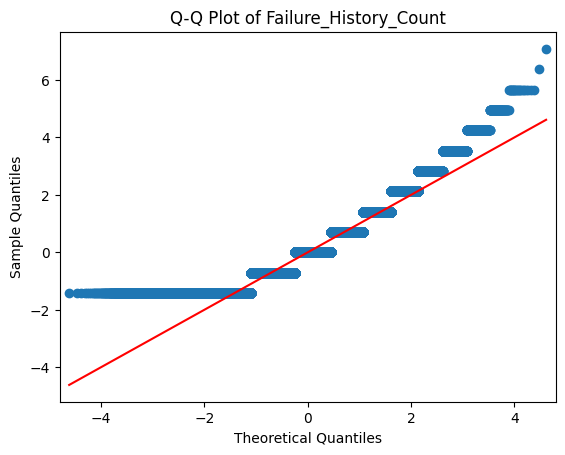

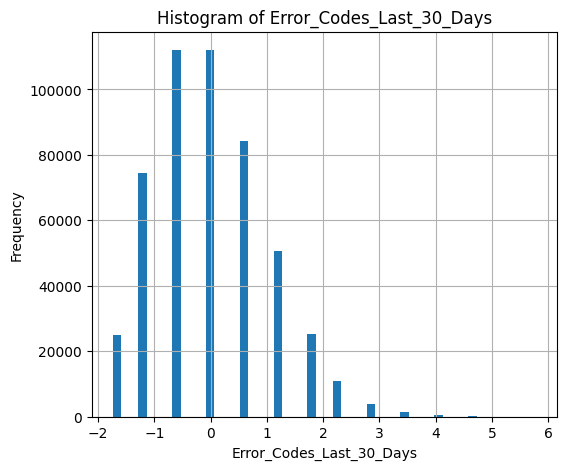

<Figure size 600x500 with 0 Axes>

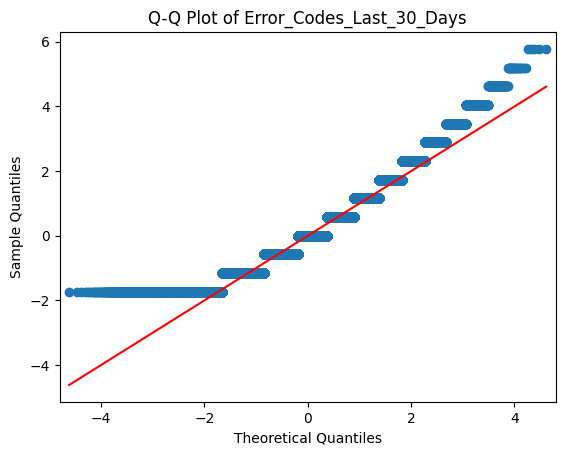

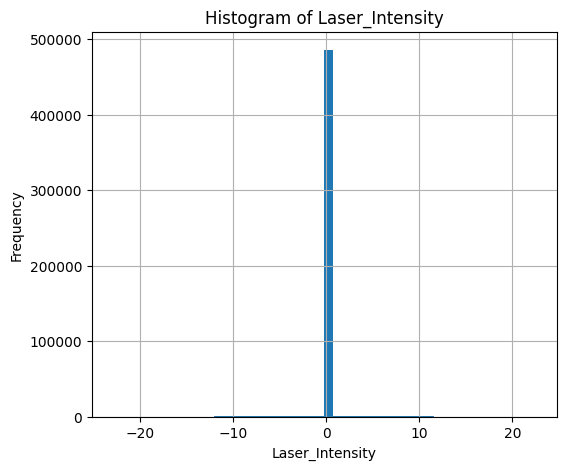

<Figure size 600x500 with 0 Axes>

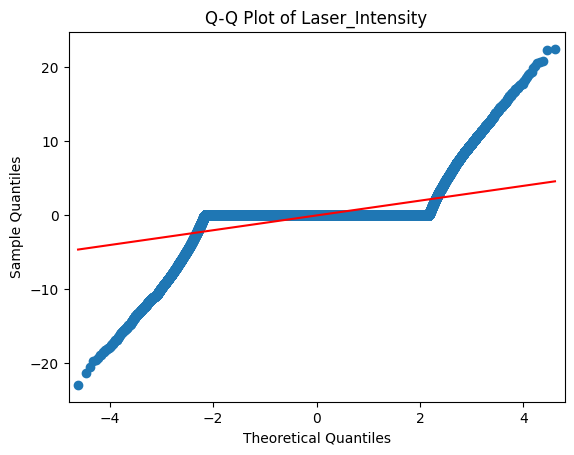

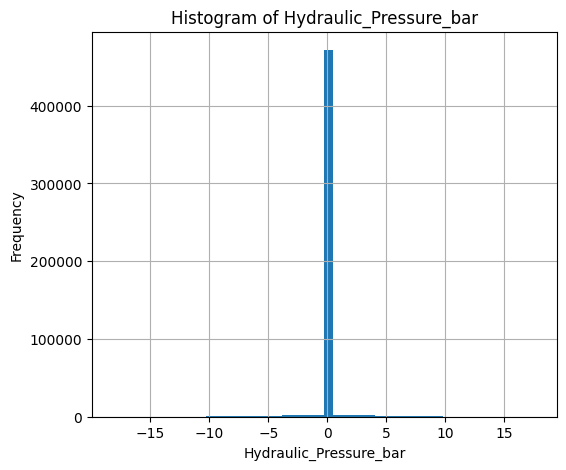

<Figure size 600x500 with 0 Axes>

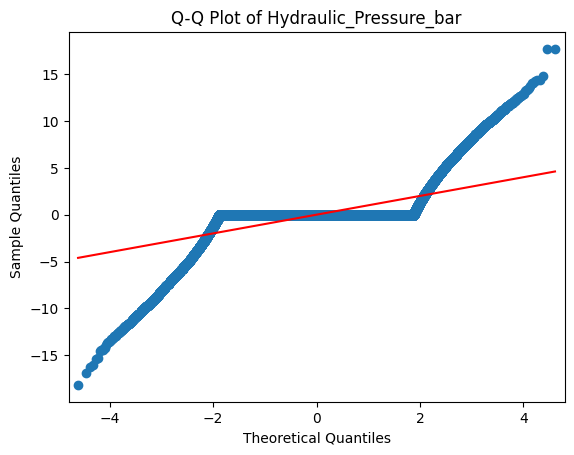

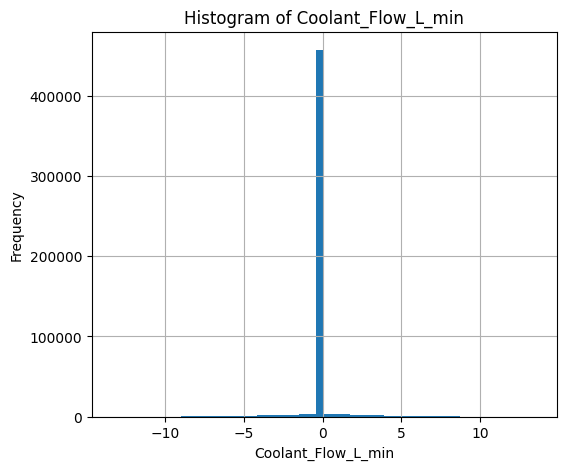

<Figure size 600x500 with 0 Axes>

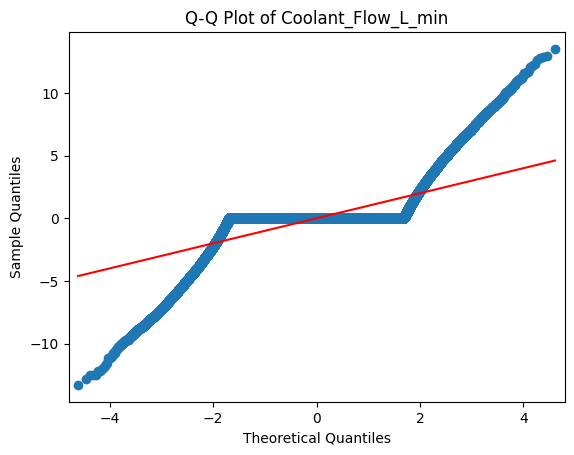

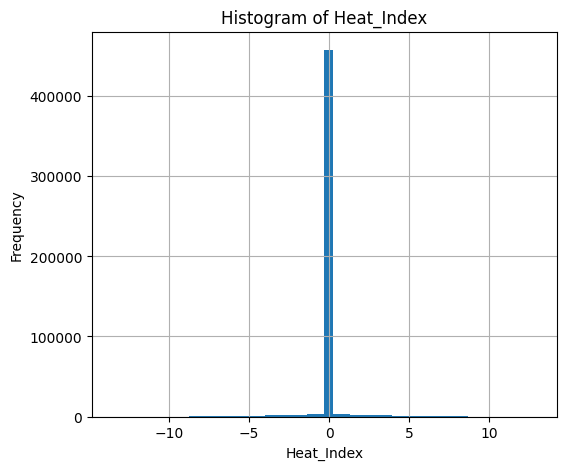

<Figure size 600x500 with 0 Axes>

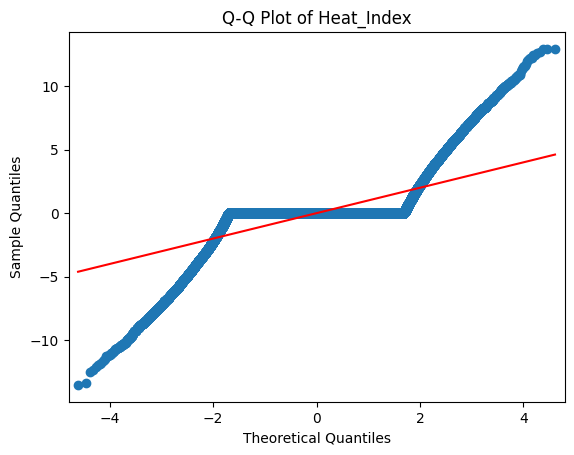

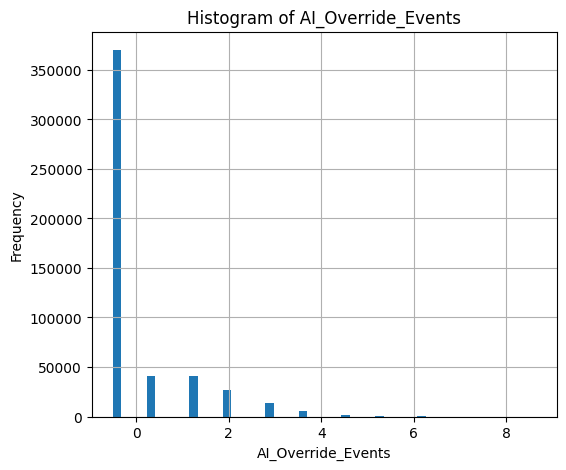

<Figure size 600x500 with 0 Axes>

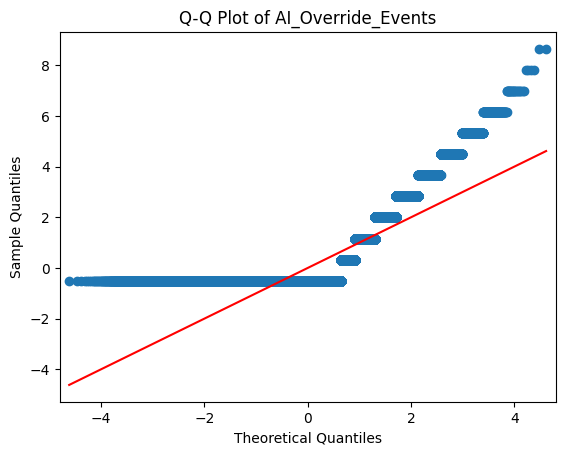

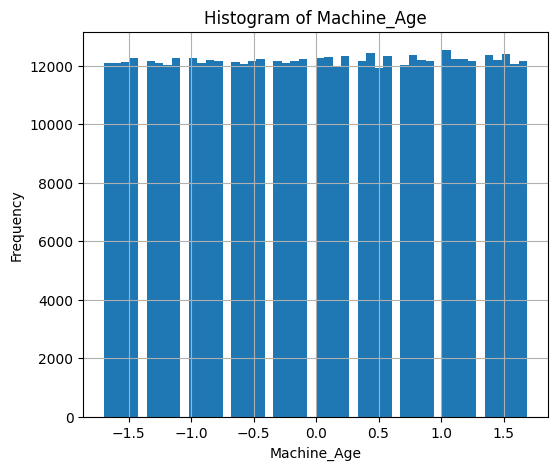

<Figure size 600x500 with 0 Axes>

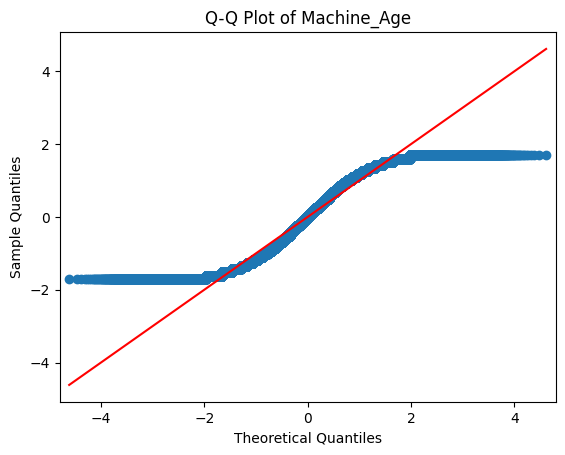

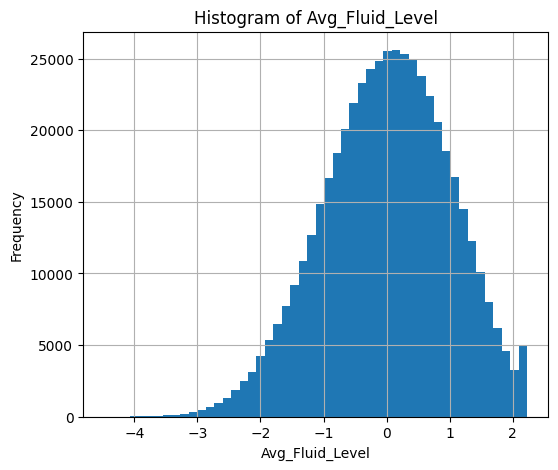

<Figure size 600x500 with 0 Axes>

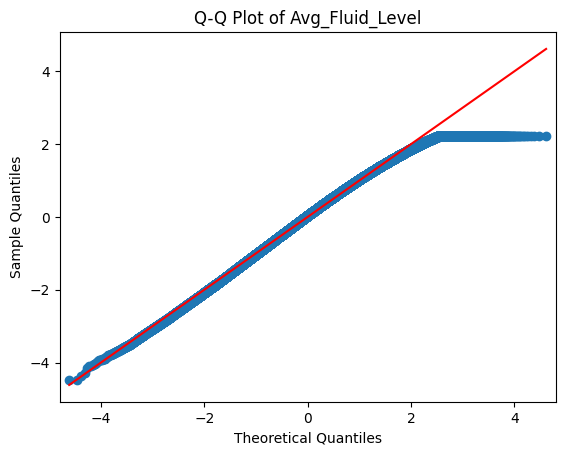

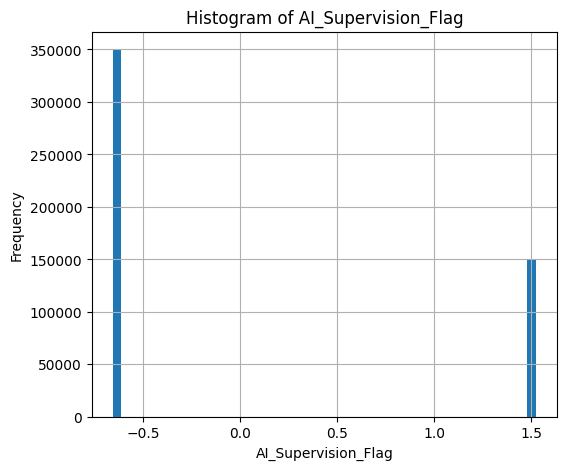

<Figure size 600x500 with 0 Axes>

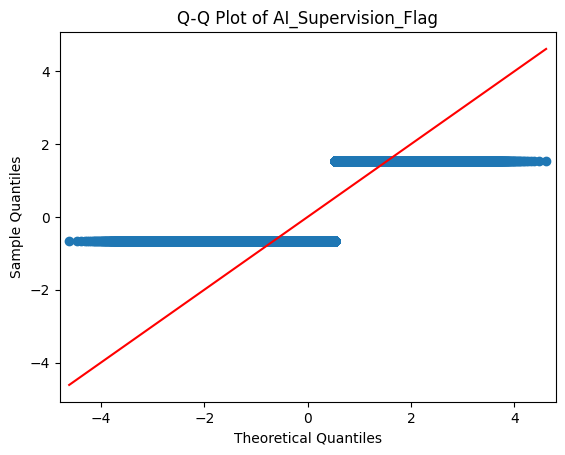

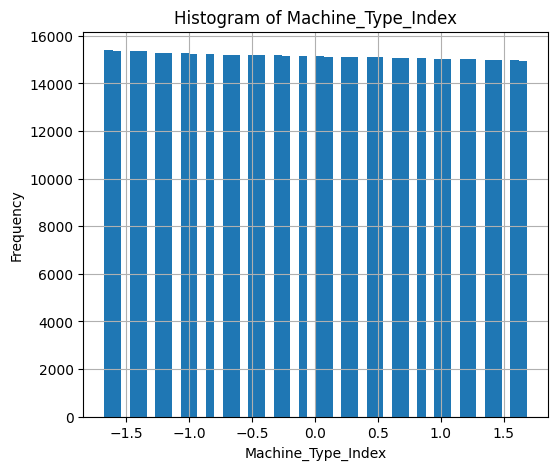

<Figure size 600x500 with 0 Axes>

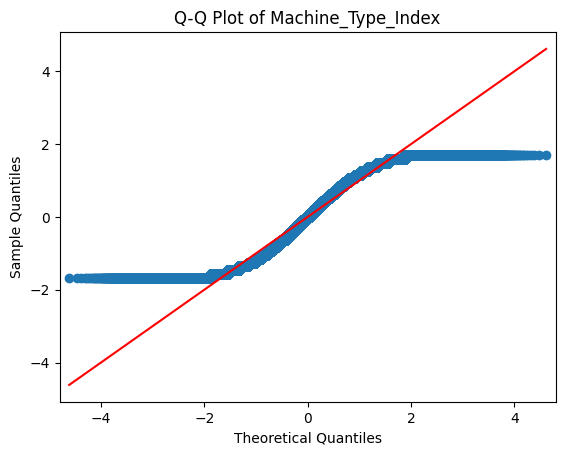

In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

numerical_cols = X.select_dtypes(include=np.number).columns

for col in numerical_cols:
    # Create histogram
    plt.figure(figsize=(6, 5))
    X[col].hist(bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Create Q-Q plot
    plt.figure(figsize=(6, 5))
    sm.qqplot(X[col], line='s')
    plt.title(f'Q-Q Plot of {col}')
    plt.show()

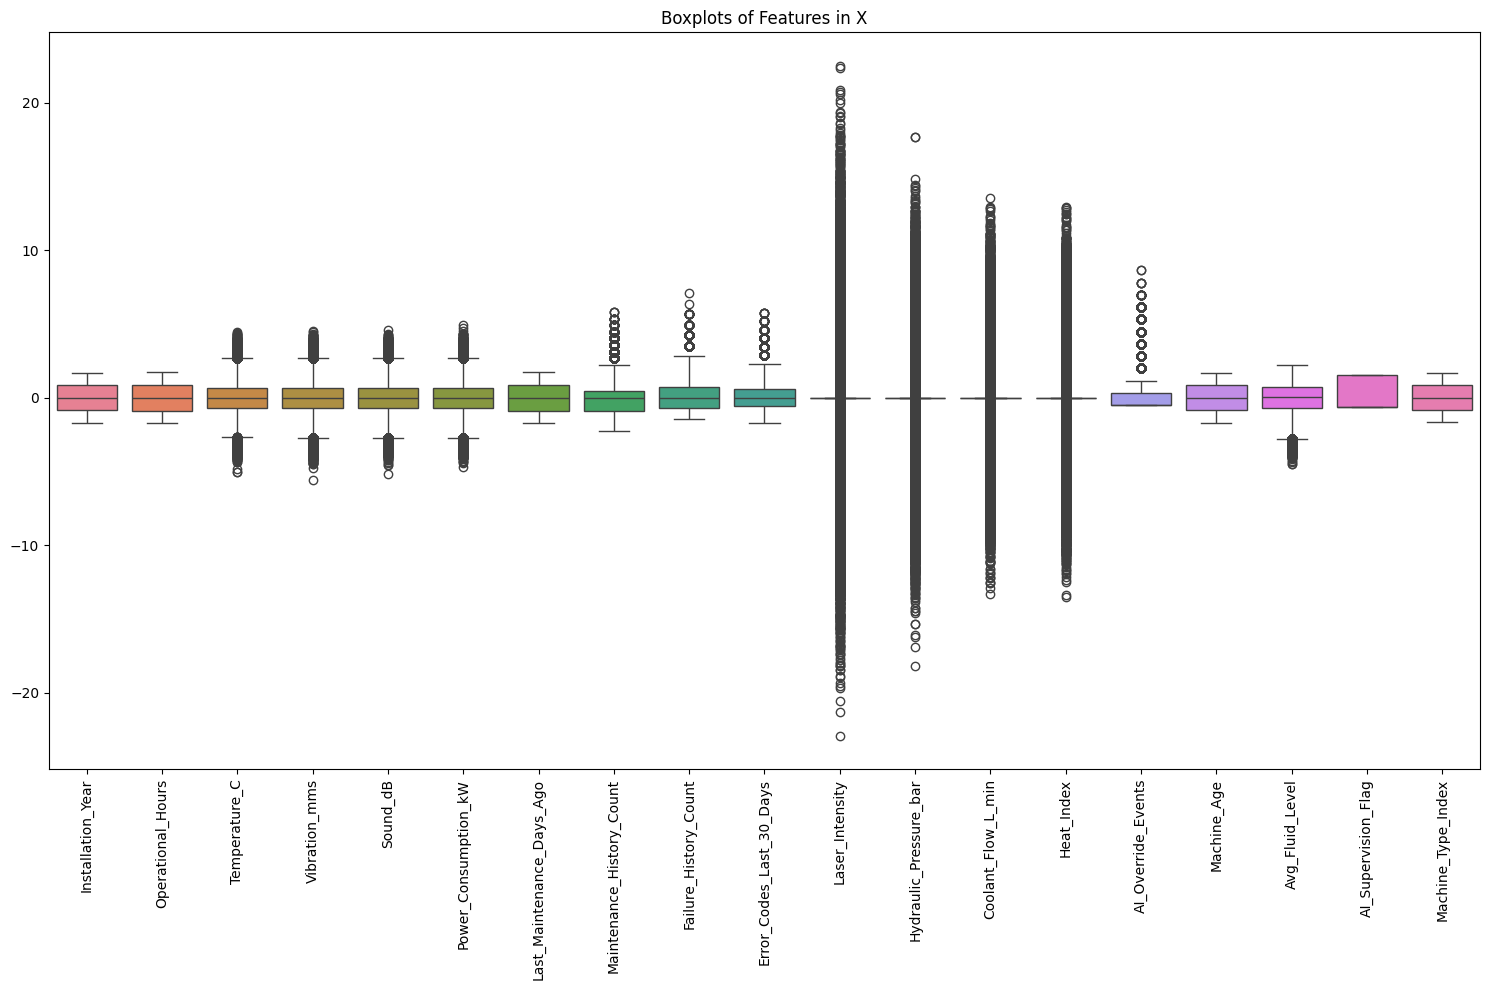

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.figure(figsize=(15, 10))

# Create a boxplot for each column in X
sns.boxplot(data=X)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title of the plot
plt.title('Boxplots of Features in X')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
# Imputing Outliers using IQR
for col in X.columns:
    q1, q3 = X[col].quantile([0.25,0.75])
    IQR = q3 - q1
    min_valid_val = q1 - 1.5 * IQR
    max_valid_val = q3 + 1.5 * IQR
    X.loc[(X[col] <min_valid_val),col] = min_valid_val
    X.loc[(X[col] >max_valid_val),col] = max_valid_val

In [21]:
from sklearn.model_selection import train_test_split

# Regression

In [22]:
X_R = X
Y_R = df['Remaining_Useful_Life_days']

In [23]:
X_R_train, X_R_test, Y_R_train, Y_R_test = train_test_split(X_R, Y_R, test_size=0.3, random_state=42)

In [24]:
X_R_train.shape, X_R_test.shape, Y_R_train.shape, Y_R_test.shape

((350000, 19), (150000, 19), (350000,), (150000,))

## Random Forest Regressor


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
# Using n_estimators=100 (default) and max_depth=10 for reasonable performance on a large dataset
rf_regressor = RandomForestRegressor(n_estimators=300,criterion='squared_error',bootstrap=True, max_depth=10,max_features=10, min_samples_split=200, random_state=42,
                                       max_samples=0.7,n_jobs=-1)

# Train the model
rf_regressor.fit(X_R_train, Y_R_train)

# Evaluate the model on the training data
Y_R_train_pred = rf_regressor.predict(X_R_train)
mse_train = mean_squared_error(Y_R_train, Y_R_train_pred)
r2_train = r2_score(Y_R_train, Y_R_train_pred)

print(f"Training Data Evaluation:")
print(f"Mean Squared Error: {mse_train:.4f}")
print(f"R-squared: {r2_train:.4f}")

# Evaluate the model on the testing data
Y_R_test_pred = rf_regressor.predict(X_R_test)
mse_test = mean_squared_error(Y_R_test, Y_R_test_pred)
r2_test = r2_score(Y_R_test, Y_R_test_pred)

print("\nTesting Data Evaluation:")
print(f"Mean Squared Error: {mse_test:.4f}")
print(f"R-squared: {r2_test:.4f}")

Training Data Evaluation:
Mean Squared Error: 2312.0372
R-squared: 0.9723

Testing Data Evaluation:
Mean Squared Error: 2385.4336
R-squared: 0.9714


## XGBoost Regressor

In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost Regressor model with hyperparameters to prevent overfitting
# Using early stopping to stop training when performance on a validation set stops improving
# You might need to split your training data further into training and validation sets for early stopping

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', # Objective function for regression
                                 n_estimators=500, # Number of boosting rounds
                                 learning_rate=0.05, # Step size shrinkage
                                 max_depth=10, # Maximum depth of a tree
                                 min_child_weight=5, # Minimum sum of instance weight (hessian) needed in a child
                                 gamma=0.1, # Minimum loss reduction required to make a further partition
                                 subsample=0.8, # Subsample ratio of the training instance
                                 colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
                                 reg_alpha=0.1, # L1 regularization term on weights
                                 reg_lambda=1, # L2 regularization term on weights
                                 random_state=42, # Random number seed
                                 n_jobs=-1) # Use all available cores

# Train the model
# If you have a validation set (e.g., X_R_val, Y_R_val), you can use early stopping:
# xgb_regressor.fit(X_R_train, Y_R_train,
#                   eval_set=[(X_R_val, Y_R_val)],
#                   early_stopping_rounds=10, # Stop if no improvement for 10 rounds
#                   verbose=False) # Set to True to see boosting rounds

xgb_regressor.fit(X_R_train, Y_R_train)


# Evaluate the model on the training data
Y_R_train_pred_xgb = xgb_regressor.predict(X_R_train)
mse_train_xgb = mean_squared_error(Y_R_train, Y_R_train_pred_xgb)
r2_train_xgb = r2_score(Y_R_train, Y_R_train_pred_xgb)

print(f"XGBoost Training Data Evaluation:")
print(f"Mean Squared Error: {mse_train_xgb:.4f}")
print(f"R-squared: {r2_train_xgb:.4f}")

# Evaluate the model on the testing data
Y_R_test_pred_xgb = xgb_regressor.predict(X_R_test)
mse_test_xgb = mean_squared_error(Y_R_test, Y_R_test_pred_xgb)
r2_test_xgb = r2_score(Y_R_test, Y_R_test_pred_xgb)

print("\nXGBoost Testing Data Evaluation:")
print(f"Mean Squared Error: {mse_test_xgb:.4f}")
print(f"R-squared: {r2_test_xgb:.4f}")

XGBoost Training Data Evaluation:
Mean Squared Error: 1511.9334
R-squared: 0.9819

XGBoost Testing Data Evaluation:
Mean Squared Error: 2389.0040
R-squared: 0.9714


## LightGBM Regressor

In [41]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the LightGBM Regressor model with hyperparameters to prevent overfitting
# Using early stopping to stop training when performance on a validation set stops improving
# You might need to split your training data further into training and validation sets for early stopping

lgb_regressor = lgb.LGBMRegressor(objective='regression', # Objective function for regression
                                  n_estimators=500, # Number of boosting rounds
                                  learning_rate=0.05, # Step size shrinkage
                                  max_depth=10, # Maximum depth of a tree
                                  num_leaves=31, # Maximum number of leaves in one tree
                                  min_child_samples=20, # Minimum number of data needed in a child
                                  subsample=0.8, # Subsample ratio of the training instance
                                  colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
                                  reg_alpha=0.1, # L1 regularization term on weights
                                  reg_lambda=1, # L2 regularization term on weights
                                  random_state=42, # Random number seed
                                  n_jobs=-1) # Use all available cores

# Train the model
# If you have a validation set (e.g., X_R_val, Y_R_val), you can use early stopping:
# lgb_regressor.fit(X_R_train, Y_R_train,
#                   eval_set=[(X_R_val, Y_R_val)],
#                   early_stopping_rounds=10, # Stop if no improvement for 10 rounds
#                   verbose=False) # Set to True to see boosting rounds

lgb_regressor.fit(X_R_train, Y_R_train)

# Evaluate the model on the training data
Y_R_train_pred_lgb = lgb_regressor.predict(X_R_train)
mse_train_lgb = mean_squared_error(Y_R_train, Y_R_train_pred_lgb)
r2_train_lgb = r2_score(Y_R_train, Y_R_train_pred_lgb)

print(f"LightGBM Training Data Evaluation:")
print(f"Mean Squared Error: {mse_train_lgb:.4f}")
print(f"R-squared: {r2_train_lgb:.4f}")

# Evaluate the model on the testing data
Y_R_test_pred_lgb = lgb_regressor.predict(X_R_test)
mse_test_lgb = mean_squared_error(Y_R_test, Y_R_test_pred_lgb)
r2_test_lgb = r2_score(Y_R_test, Y_R_test_pred_lgb)

print("\nLightGBM Testing Data Evaluation:")
print(f"Mean Squared Error: {mse_test_lgb:.4f}")
print(f"R-squared: {r2_test_lgb:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.156104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1935
[LightGBM] [Info] Number of data points in the train set: 350000, number of used features: 15
[LightGBM] [Info] Start training from score 452.720066
LightGBM Training Data Evaluation:
Mean Squared Error: 2261.3110
R-squared: 0.9729

LightGBM Testing Data Evaluation:
Mean Squared Error: 2336.3539
R-squared: 0.9720


# Classification

In [26]:
X_C = X
Y_C = df['Failure_Within_7_Days']

In [27]:
Y_C = Y_C.replace({False: 0, True: 1})
Y_C.head()

/tmp/ipython-input-3461774901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_C = Y_C.replace({False: 0, True: 1})


,Failure_Within_7_Days
0,0
1,0
2,0
3,0
4,0


In [28]:
Y_C.value_counts()

,count
Failure_Within_7_Days,
0,469968
1,30032


In [29]:
# Perform undersampling to balance the classes
X_C_0 = X_C[Y_C == 0]
Y_C_0 = Y_C[Y_C == 0]
X_C_1 = X_C[Y_C == 1]
Y_C_1 = Y_C[Y_C == 1]

# Undersample the majority class (0) to match the number of samples in the minority class (1)
X_C_0_undersampled = X_C_0.sample(len(X_C_1), random_state=42)
Y_C_0_undersampled = Y_C_0.sample(len(Y_C_1), random_state=42)

# Concatenate the undersampled majority class with the minority class
X_C_undersampled = pd.concat([X_C_0_undersampled, X_C_1])
Y_C_undersampled = pd.concat([Y_C_0_undersampled, Y_C_1])

# Display the shape of the undersampled data
print("Shape of undersampled X_C:", X_C_undersampled.shape)
print("Shape of undersampled Y_C:", Y_C_undersampled.shape)

# Display the value counts of the undersampled target variable
print("\nValue counts of undersampled Y_C:")
print(Y_C_undersampled.value_counts())

Shape of undersampled X_C: (60064, 19)
Shape of undersampled Y_C: (60064,)

Value counts of undersampled Y_C:
Failure_Within_7_Days
0    30032
1    30032
Name: count, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split

X_C_train, X_C_test, Y_C_train, Y_C_test = train_test_split(X_C_undersampled, Y_C_undersampled, test_size=0.3, random_state=42, stratify=Y_C_undersampled)

In [32]:
X_C_train.shape, X_C_test.shape, Y_C_train.shape, Y_C_test.shape

((42044, 19), (18020, 19), (42044,), (18020,))

## Random Forest Classifier



Training Data Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     21022
           1       0.93      0.98      0.95     21022

    accuracy                           0.95     42044
   macro avg       0.95      0.95      0.95     42044
weighted avg       0.95      0.95      0.95     42044

Accuracy: 0.9522642945485682
Confusion Matrix:
 [[19417  1605]
 [  402 20620]]

Testing Data Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95      9010
           1       0.93      0.98      0.95      9010

    accuracy                           0.95     18020
   macro avg       0.95      0.95      0.95     18020
weighted avg       0.95      0.95      0.95     18020

Accuracy: 0.9500554938956715
Confusion Matrix:
 [[8321  689]
 [ 211 8799]]


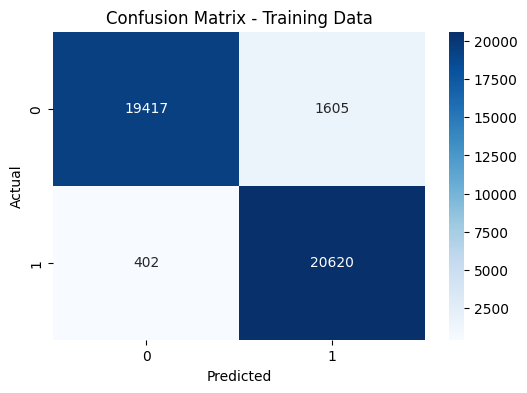

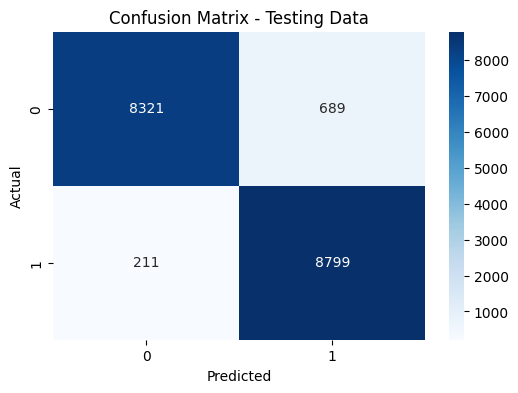


Log Loss (Random Forest Classifier) on Testing Data: 0.1404


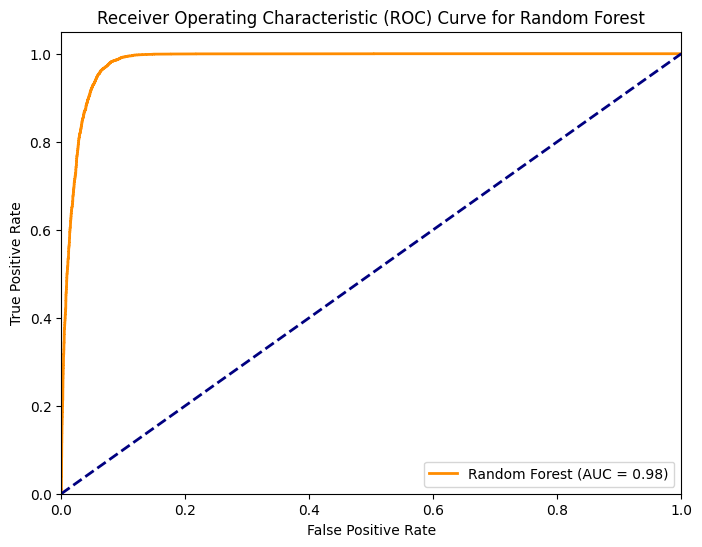

AUC for Random Forest: 0.9828


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier model with adjusted hyperparameters
# Increased min_samples_split and min_samples_leaf to help prevent overfitting on a large dataset
rf_classifier = RandomForestClassifier(n_estimators=300,criterion='gini',bootstrap=True, max_depth=10,max_features=10, min_samples_split=200, random_state=42,
                                       max_samples=0.7,n_jobs=-1)


# Train the model
rf_classifier.fit(X_C_train, Y_C_train)

# Evaluate the model on the training data
Y_C_train_pred_rf = rf_classifier.predict(X_C_train)
print("\nTraining Data Evaluation:")
print("Classification Report:\n", classification_report(Y_C_train, Y_C_train_pred_rf))
print("Accuracy:", accuracy_score(Y_C_train, Y_C_train_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(Y_C_train, Y_C_train_pred_rf))

# Evaluate the best model on the testing data
Y_C_test_pred_rf = rf_classifier.predict(X_C_test)
print("\nTesting Data Evaluation:")
print("Classification Report:\n", classification_report(Y_C_test, Y_C_test_pred_rf))
print("Accuracy:", accuracy_score(Y_C_test, Y_C_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(Y_C_test, Y_C_test_pred_rf))

# Draw confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_C_train, Y_C_train_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Draw confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_C_test, Y_C_test_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict probabilities on the testing data
Y_C_test_proba_rf = rf_classifier.predict_proba(X_C_test)

# Calculate log loss on the testing data
log_loss_test_rf = log_loss(Y_C_test, Y_C_test_proba_rf)
print(f"\nLog Loss (Random Forest Classifier) on Testing Data: {log_loss_test_rf:.4f}")

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_C_test, Y_C_test_proba_rf[:, 1])
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

print(f"AUC for Random Forest: {auc_rf:.4f}")

## XGBoost Classifier


XGBoost Training Data Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     21022
           1       0.99      1.00      0.99     21022

    accuracy                           0.99     42044
   macro avg       0.99      0.99      0.99     42044
weighted avg       0.99      0.99      0.99     42044

Accuracy: 0.9934830177908858
Confusion Matrix:
 [[20761   261]
 [   13 21009]]

XGBoost Testing Data Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      9010
           1       0.93      0.97      0.95      9010

    accuracy                           0.95     18020
   macro avg       0.95      0.95      0.95     18020
weighted avg       0.95      0.95      0.95     18020

Accuracy: 0.947780244173141
Confusion Matrix:
 [[8308  702]
 [ 239 8771]]


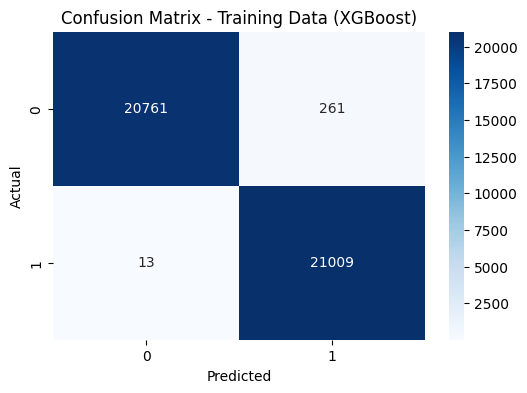

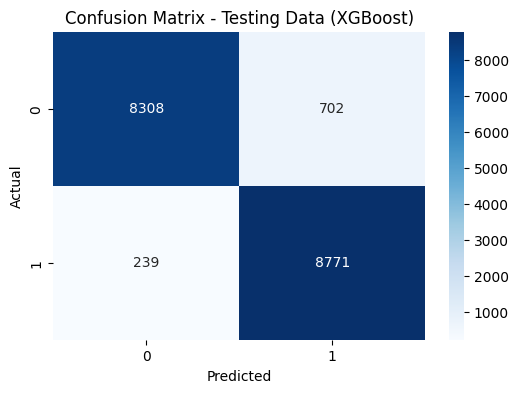


Log Loss (XGBoost Classifier) on Testing Data: 0.1549


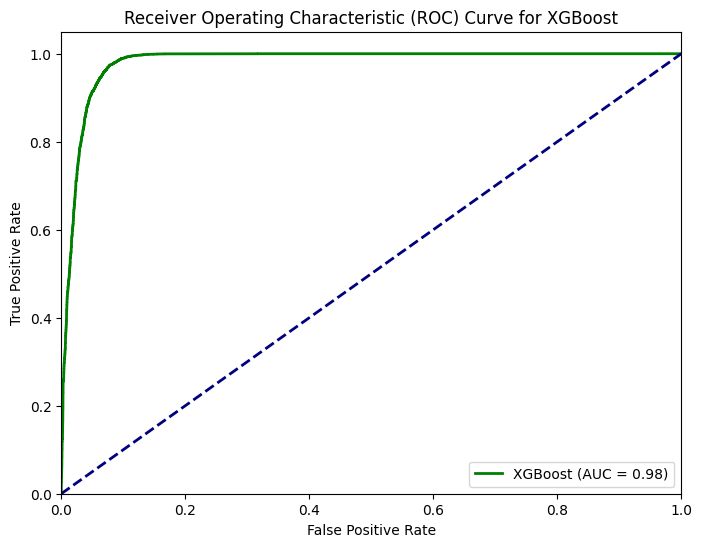

AUC for XGBoost: 0.9804


In [54]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost Classifier model with hyperparameters to prevent overfitting
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', # Objective function for binary classification
                                   n_estimators=500, # Number of boosting rounds
                                   learning_rate=0.05, # Step size shrinkage
                                   max_depth=10, # Maximum depth of a tree
                                   min_child_weight=5, # Minimum sum of instance weight (hessian) needed in a child
                                   gamma=0.1, # Minimum loss reduction required to make a further partition
                                   subsample=0.8, # Subsample ratio of the training instance
                                   colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
                                   reg_alpha=0.1, # L1 regularization term on weights
                                   reg_lambda=1, # L2 regularization term on weights
                                   random_state=42, # Random number seed
                                   n_jobs=-1) # Use all available cores


# Train the model
xgb_classifier.fit(X_C_train, Y_C_train)

# Evaluate the model on the training data
Y_C_train_pred_xgb = xgb_classifier.predict(X_C_train)
print("\nXGBoost Training Data Evaluation:")
print("Classification Report:\n", classification_report(Y_C_train, Y_C_train_pred_xgb))
print("Accuracy:", accuracy_score(Y_C_train, Y_C_train_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_C_train, Y_C_train_pred_xgb))

# Evaluate the model on the testing data
Y_C_test_pred_xgb = xgb_classifier.predict(X_C_test)
print("\nXGBoost Testing Data Evaluation:")
print("Classification Report:\n", classification_report(Y_C_test, Y_C_test_pred_xgb))
print("Accuracy:", accuracy_score(Y_C_test, Y_C_test_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_C_test, Y_C_test_pred_xgb))

# Draw confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_C_train, Y_C_train_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Data (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Draw confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_C_test, Y_C_test_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Data (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict probabilities on the testing data
Y_C_test_proba_xgb = xgb_classifier.predict_proba(X_C_test)

# Calculate log loss on the testing data
log_loss_test_xgb = log_loss(Y_C_test, Y_C_test_proba_xgb)

print(f"\nLog Loss (XGBoost Classifier) on Testing Data: {log_loss_test_xgb:.4f}")

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_C_test, Y_C_test_proba_xgb[:, 1])
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

print(f"AUC for XGBoost: {auc_xgb:.4f}")

## LightGBM Classifier

[LightGBM] [Info] Number of positive: 21022, number of negative: 21022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1933
[LightGBM] [Info] Number of data points in the train set: 42044, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Training Data Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     21022
           1       0.95      0.99      0.97     21022

    accuracy                           0.97     42044
   macro avg       0.97      0.97      0.97     42044
weighted avg       0.97      0.97      0.97     42044

Accuracy: 0.9712919798306536
Confusion Matrix:
 [[19926  1096]
 [  111 20911]]

LightGBM Testing Data Evaluation:
Classification Report:
               precision    recall  f

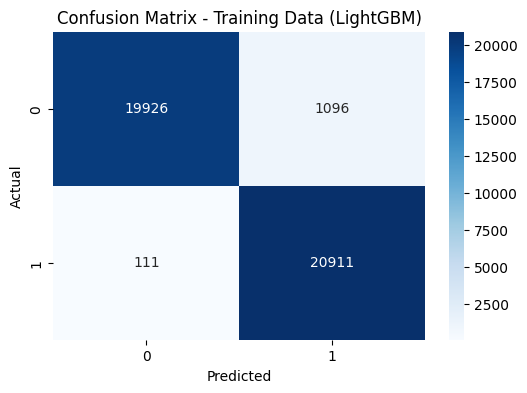

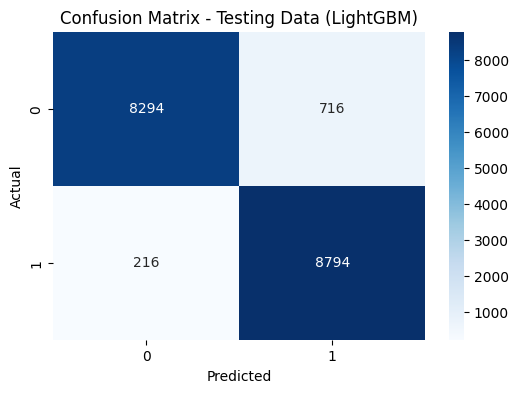


Log Loss (LightGBM Classifier) on Testing Data: 0.1440


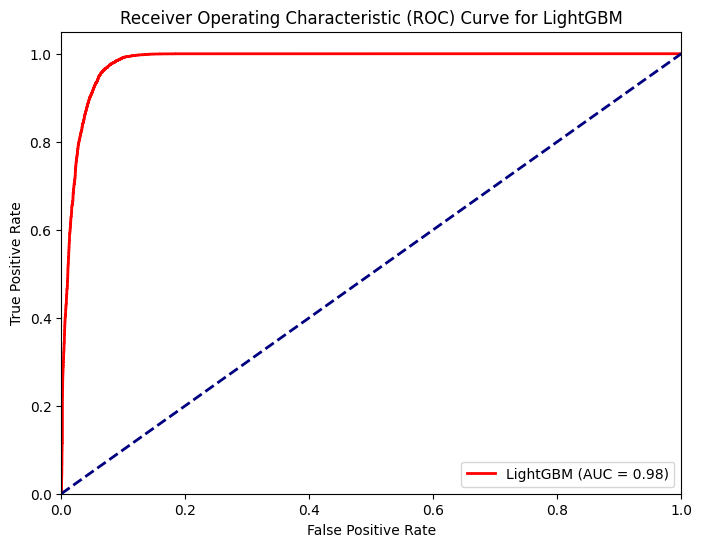

AUC for LightGBM: 0.9822


In [55]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the LightGBM Classifier model with hyperparameters to prevent overfitting
lgb_classifier = lgb.LGBMClassifier(objective='binary', # Objective function for binary classification
                                   n_estimators=500, # Number of boosting rounds
                                   learning_rate=0.05, # Step size shrinkage
                                   max_depth=10, # Maximum depth of a tree
                                   num_leaves=31, # Maximum number of leaves in one tree
                                   min_child_samples=20, # Minimum number of data needed in a child
                                   subsample=0.8, # Subsample ratio of the training instance
                                   colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
                                   reg_alpha=0.1, # L1 regularization term on weights
                                   reg_lambda=1, # L2 regularization term on weights
                                   random_state=42, # Random number seed
                                   n_jobs=-1) # Use all available cores

# Train the model
lgb_classifier.fit(X_C_train, Y_C_train)

# Evaluate the model on the training data
Y_C_train_pred_lgb = lgb_classifier.predict(X_C_train)
print("\nLightGBM Training Data Evaluation:")
print("Classification Report:\n", classification_report(Y_C_train, Y_C_train_pred_lgb))
print("Accuracy:", accuracy_score(Y_C_train, Y_C_train_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(Y_C_train, Y_C_train_pred_lgb))

# Evaluate the model on the testing data
Y_C_test_pred_lgb = lgb_classifier.predict(X_C_test)
print("\nLightGBM Testing Data Evaluation:")
print("Classification Report:\n", classification_report(Y_C_test, Y_C_test_pred_lgb))
print("Accuracy:", accuracy_score(Y_C_test, Y_C_test_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(Y_C_test, Y_C_test_pred_lgb))

# Draw confusion matrix for training data
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_C_train, Y_C_train_pred_lgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Data (LightGBM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Draw confusion matrix for testing data
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_C_test, Y_C_test_pred_lgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Testing Data (LightGBM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict probabilities on the testing data
Y_C_test_proba_lgb = lgb_classifier.predict_proba(X_C_test)

# Calculate log loss on the testing data
log_loss_test_lgb = log_loss(Y_C_test, Y_C_test_proba_lgb)

print(f"\nLog Loss (LightGBM Classifier) on Testing Data: {log_loss_test_lgb:.4f}")

# Calculate ROC curve and AUC for LightGBM
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(Y_C_test, Y_C_test_proba_lgb[:, 1])
auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plot ROC curve for LightGBM
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, color='red', lw=2, label=f'LightGBM (AUC = {auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM')
plt.legend(loc="lower right")
plt.show()

print(f"AUC for LightGBM: {auc_lgb:.4f}")